# Neste notebook estarei buscando responder:

Quais empresas mais participaram dos consórcios?

Quais empresas mais apareceram como líder do consórcio?

Quais consórcios tiveram mais participantes?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
sns.set(style = 'whitegrid')

ARQ = '../base_dados/bd_2.csv'

df = pd.read_csv(
    ARQ,
    sep = ';',
    decimal = ',',
    encoding = 'latin1'
)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

df['pp_consorcio'] = df['pp_consorcio'].round(4)

df['empresa'] = df['empresa'].str.strip().str.upper()
df['consorcio'] = df['consorcio'].str.strip().str.upper()

In [63]:
# Tratando as duplicatas para contar as empreasas apenas uma vez por consórcio
df_consorcios = df.dropna(subset=['cnpj_consorcio', 'cnpj_empresa'])

participacoes_unicas = df_consorcios.drop_duplicates(subset=['cnpj_consorcio', 'cnpj_empresa'])

empresas_mais_participativas = participacoes_unicas['empresa'].value_counts().head(5)

# print("Empresas que mais participaram de consórcios:")
# print(empresas_mais_participativas)


In [50]:
# Funciona, mas o nomes das empresas estão se sobrepondo

# plt.figure(figsize=(12, 8))

# grafico = sns.barplot(x=empresas_mais_participativas.index,
#                       y=empresas_mais_participativas,
#                       hue=empresas_mais_participativas,  
#                       palette='crest', 
#                       edgecolor='black',
#                       linewidth=0.5)

# for container in grafico.containers:
#     grafico.bar_label(container, fmt='%.0f', padding=5)

# plt.title('Top 15 Empresas com Mais Participações em Consórcios', fontsize=16, fontweight='bold')
# plt.xlabel('Número de Consórcios', fontsize=12)
# plt.ylabel('Empresa', fontsize=12)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
# plt.show()

### Quais empresas mais participaram dos consórcios?

Aqui estamos analisando o **número de consórcios que cada empresa participou**.

O gráfico a seguir exibe o **Top 5** das empresas com **mais participações em consórcios**.

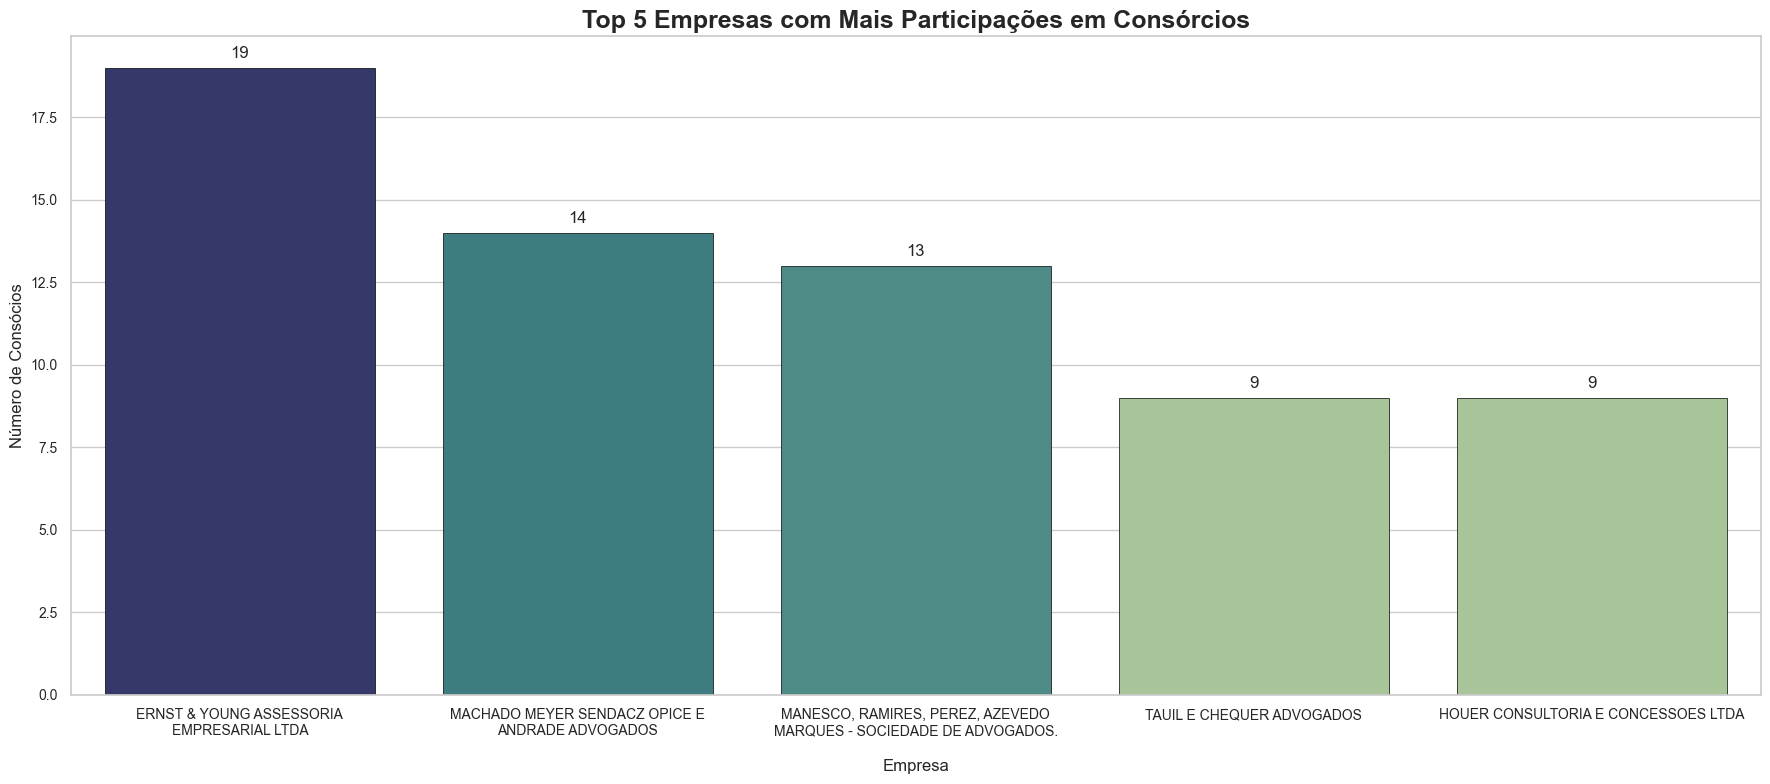

In [52]:
import textwrap

# Preprando os rótulos antes de plotar para não ficar com os nomes das empresas sobrepostos:
nomes_originais = empresas_mais_participativas.index

wrap_width = 35 
nomes_formatados = [textwrap.fill(nome, width=wrap_width) for nome in nomes_originais]

# Criando uma cópia da série de dados para não alterar a original
dados_para_plot = empresas_mais_participativas.copy()
dados_para_plot.index = nomes_formatados

plt.figure(figsize=(18, 8))

grafico = sns.barplot(x=dados_para_plot.index,
                      y=dados_para_plot.values,
                      hue=dados_para_plot,  
                      palette='crest', 
                      edgecolor='black',
                      linewidth=0.5,
                      legend=False)

for container in grafico.containers:
    grafico.bar_label(container, fmt='%.0f', padding=5)

plt.title('Top 5 Empresas com Mais Participações em Consórcios', fontsize=18, fontweight='bold')
plt.xlabel('Empresa', fontsize=12, labelpad=15)
plt.ylabel('Número de Consócios', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout() 
plt.show()

### Quais empresas mais apareceram como líder do consórcio?

Aqui estamos analisando quais empresas **mais lideraram consórcios**.

O gráfico a seguir exibe o **Top 5** das empresas que **mais lideraram consórcios**.

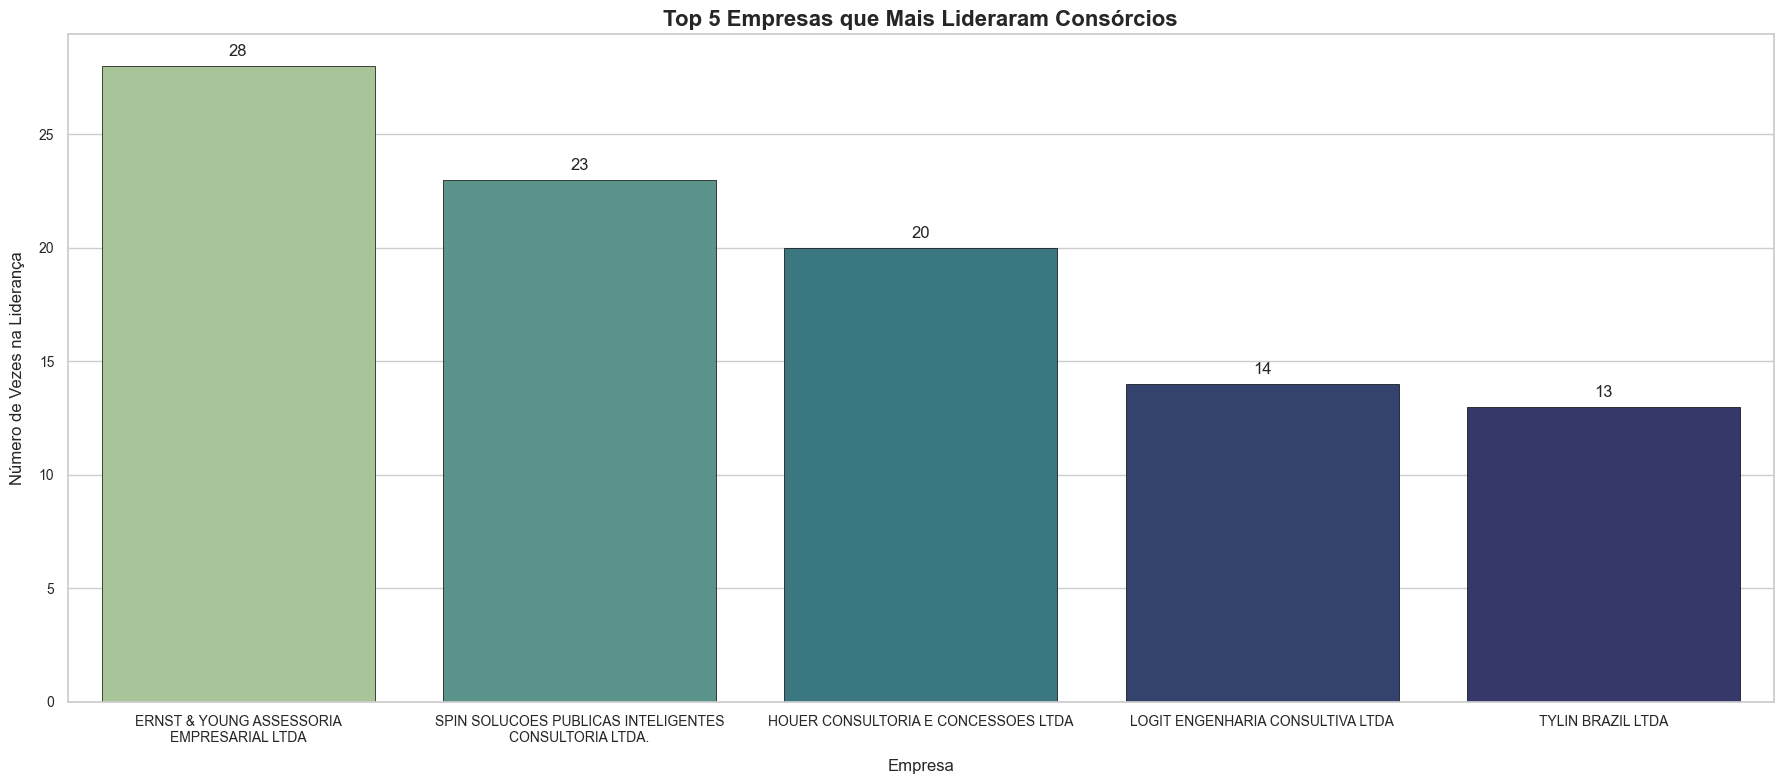

In [62]:
lideres_de_consorcio = df[df['lider_consorcio'].str.upper() == 'SIM']

empresas_mais_lideres = lideres_de_consorcio['empresa'].value_counts().head(5)

# print("\nEmpresas que mais apareceram como líder do consórcio:")
# print(empresas_mais_lideres)

nomes_originais = empresas_mais_lideres.index
wrap_width = 35 
nomes_formatados = [textwrap.fill(nome, width=wrap_width) for nome in nomes_originais]

dados_para_plot = empresas_mais_lideres.copy()
dados_para_plot.index = nomes_formatados

plt.figure(figsize=(18, 8))

grafico = sns.barplot(x=dados_para_plot.index, 
                      y=dados_para_plot.values,
                      hue=dados_para_plot,  
                      palette='crest_r', 
                      edgecolor='black',
                      linewidth=0.5,
                      legend=False)

for container in grafico.containers:
    grafico.bar_label(container, fmt='%.0f', padding=5)

plt.title('Top 5 Empresas que Mais Lideraram Consórcios', fontsize=16, fontweight='bold')
plt.xlabel('Empresa', fontsize=12, labelpad=10)
plt.ylabel('Número de Vezes na Liderança', fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Quais consórcios tiveram mais participantes?

Aqui estamos analisando os **consórcios que mais tiveram participantes**.

O gráfico a seguir exibe o **Top 5** de consórcios com **mais participantes**.

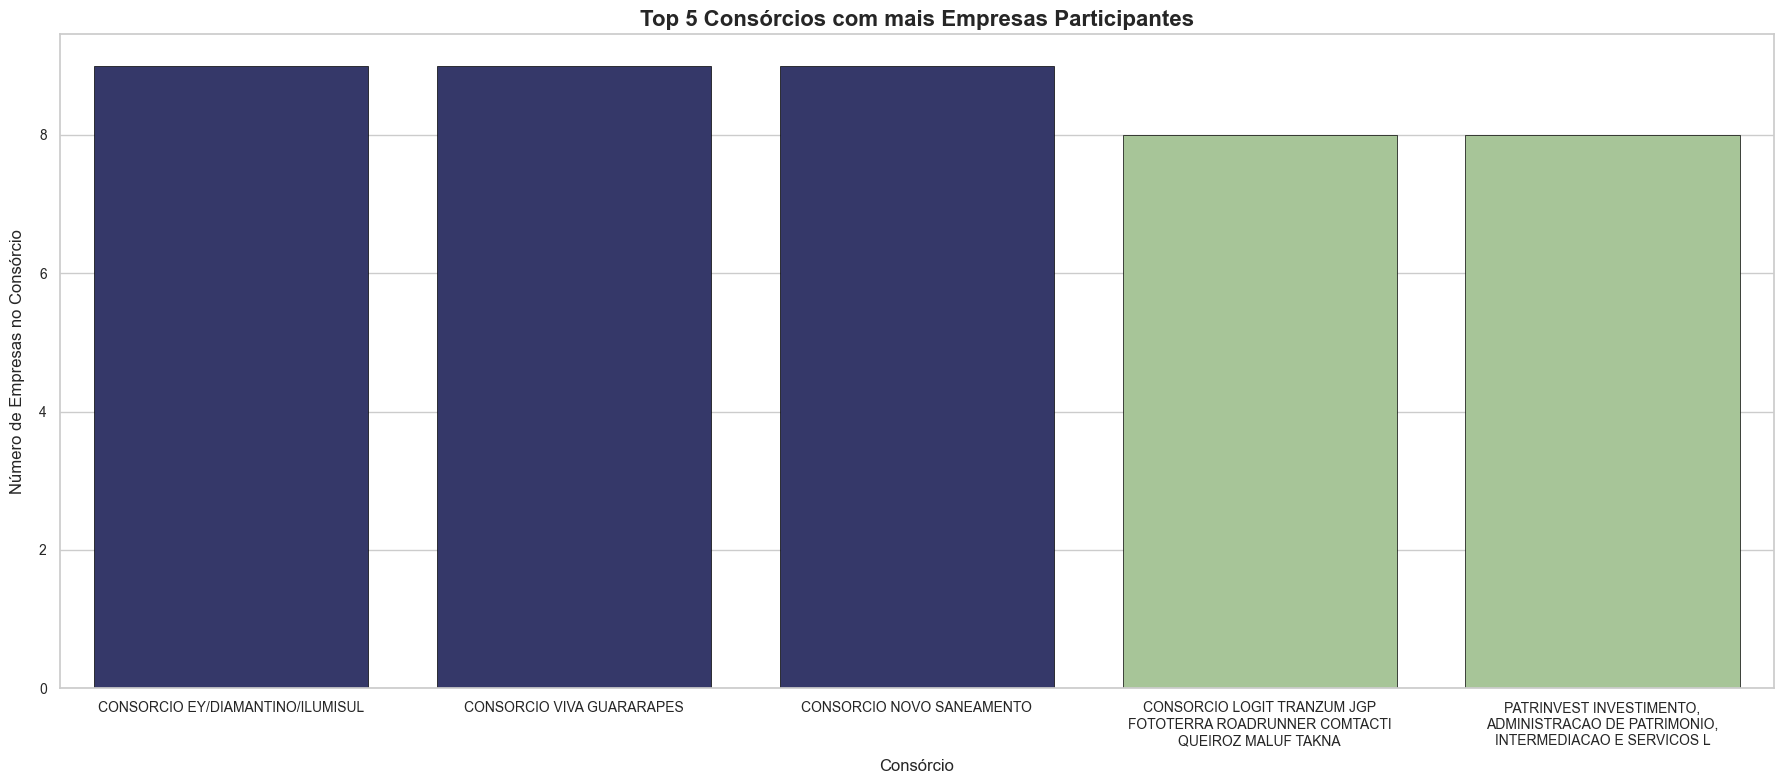

In [69]:
consorcios_com_mais_participantes = participacoes_unicas['consorcio'].value_counts().head(5)

# print("\nConsórcios com mais empresas participantes:")
# print(consorcios_com_mais_participantes)

nomes_originais = consorcios_com_mais_participantes.index
wrap_width = 35 
nomes_formatados = [textwrap.fill(nome, width=wrap_width) for nome in nomes_originais]

dados_para_plot = consorcios_com_mais_participantes.copy()
dados_para_plot.index = nomes_formatados

plt.figure(figsize=(18, 8))

grafico = sns.barplot(x=dados_para_plot.index, 
                      y=dados_para_plot.values,
                      hue=dados_para_plot,  
                      palette='crest', 
                      edgecolor='black',
                      linewidth=0.5,
                      legend=False)

# Não acho que seja necessário os rotulos nesse gráfico.
# for container in grafico.containers:
#     grafico.bar_label(container, fmt='%.0f', padding=5)

plt.title('Top 5 Consórcios com mais Empresas Participantes', fontsize=16, fontweight='bold')
plt.xlabel('Consórcio', fontsize=12, labelpad=8)
plt.ylabel('Número de Empresas no Consórcio', fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()